#Proyek Prediksi Harga Rumah di California - Muhammad Zainudin Damar Jati

Proyek ini bertujuan untuk membangun model regresi prediktif guna memperkirakan harga rumah (median house value) di wilayah California. Model dikembangkan dengan pendekatan machine learning menggunakan algoritma HistGradientBoostingRegressor, yang merupakan metode boosting efisien untuk dataset tabular skala menengah. Proyek ini dikemas dalam sebuah pipeline lengkap yang mencakup tahap praproses data, eksplorasi data (EDA), pemodelan, evaluasi, hingga prediksi terhadap data baru.

Model dibangun berdasarkan dataset California Housing, yang berisi informasi demografis dan geospasial dari berbagai blok perumahan di California.

##1. Problem Domain

Tujuan: Memprediksi harga rumah berdasarkan fitur-fitur demografi dan properti di California.

Tujuan proyek ini adalah untuk memprediksi harga rumah di California berdasarkan atribut demografis dan properti, seperti jumlah kamar, usia bangunan, populasi, dan kedekatannya terhadap laut. Karena variabel target berupa angka kontinu (median_house_value), masalah ini termasuk ke dalam regresi, bukan klasifikasi. Memahami domain masalah ini penting agar pendekatan dan metrik evaluasi yang digunakan selaras dengan tujuan prediksi.

##2. Import Library

### Import Library dan Konfigurasi Awal

Pada bagian ini, kita mengimpor berbagai pustaka yang dibutuhkan untuk proses pemodelan Machine Learning, serta melakukan beberapa konfigurasi awal:

- `warnings.filterwarnings("ignore", category=FutureWarning)`  
  Menonaktifkan peringatan tipe *FutureWarning* agar output lebih bersih.


#### Pustaka Dasar Python dan Visualisasi

- `time`, `math` – untuk pengukuran waktu dan operasi matematika.
- `numpy`, `pandas` – manipulasi array dan data tabular.
- `seaborn`, `matplotlib.pyplot` – visualisasi data.


#### Modul Scikit-learn

- `train_test_split`, `RandomizedSearchCV`, `cross_val_score` – pembagian data dan validasi model.
- `HistGradientBoostingRegressor` – algoritma ensemble boosting untuk regresi.
- `mean_squared_error`, `r2_score`, `mean_absolute_error` – metrik evaluasi model.
- `MinMaxScaler`, `OneHotEncoder` – preprocessing fitur.
- `SimpleImputer`, `ColumnTransformer`, `Pipeline` – pipeline dan penanganan data yang hilang.


- `files` – dari `google.colab`, digunakan untuk mengunggah atau mengunduh file dari dan ke Google Colab.

- `sns.set_theme(style="darkgrid")`  
  Mengatur tema default visualisasi Seaborn dengan tampilan bergrid gelap.


In [26]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import time, math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from google.colab import files
sns.set_theme(style="darkgrid")

##3. Data Understanding

###Mengunggah dan Membaca Dataset

Pada tahap awal ini, kita akan mengunggah dan membaca data California Housing menggunakan Google Colab dan pustaka `pandas`.

* `files.upload()`
  Digunakan untuk mengunggah file dari komputer lokal ke lingkungan Google Colab.

* `pd.read_csv("housing.csv")`
  Membaca file CSV dan memuatnya ke dalam DataFrame `df` untuk analisis lebih lanjut.


In [2]:
uploaded = files.upload()
df = pd.read_csv("housing.csv")

Saving housing.csv to housing.csv


### Deskripsi Dataset

Dataset yang digunakan merupakan bagian dari **California Housing data** yang berisi informasi dari sensus penduduk California tahun 1990. Setiap baris merepresentasikan satu blok (kawasan perumahan kecil), dengan berbagai fitur demografis dan perumahan.

| Fitur                | Tipe        | Deskripsi                                              |
| -------------------- | ----------- | ------------------------------------------------------ |
| `longitude`          | numerik     | Koordinat geografis garis bujur                        |
| `latitude`           | numerik     | Koordinat geografis garis lintang                      |
| `housing_median_age` | numerik     | Umur median bangunan di blok tersebut                  |
| `total_rooms`        | numerik     | Total jumlah ruangan di blok                           |
| `total_bedrooms`     | numerik     | Total jumlah kamar tidur                               |
| `population`         | numerik     | Jumlah penduduk di blok                                |
| `households`         | numerik     | Jumlah keluarga atau unit rumah tangga                 |
| `median_income`      | numerik     | Pendapatan rata-rata penduduk (dalam puluhan ribu USD) |
| `ocean_proximity`    | kategorikal | Kedekatan blok terhadap laut                           |
| `median_house_value` | numerik     | **Target:** Nilai median rumah di blok (dalam USD)     |

Dataset ini akan digunakan untuk membangun model regresi dalam rangka memprediksi harga median rumah berdasarkan fitur-fitur demografis dan geografis yang tersedia.


### Menampilkan Sampel Data

Menampilkan 5 baris pertama dari dataset untuk memberikan gambaran umum tentang struktur dan isi data.


In [3]:
print("Sample data:")
display(df.head())

Sample data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Informasi Struktur Dataset

Menampilkan informasi umum mengenai dataset, seperti jumlah entri, jumlah kolom, tipe data, serta jumlah nilai non-null pada setiap kolom.


In [4]:
print("Informasi Data:")
df.info()

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Mengecek Nilai Hilang

Menghitung jumlah nilai yang hilang (missing values) pada masing-masing kolom dalam dataset. Hal ini penting untuk mengetahui apakah perlu dilakukan imputasi atau pembersihan data sebelum pemodelan.


In [5]:
print("\nJumlah Nilai Hilang:")
print(df.isna().sum())


Jumlah Nilai Hilang:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


##4. Data Preparation

### Penanganan Nilai Hilang dan Teknik Rekayasa Fitur

Pada tahap ini, kita melakukan imputasi nilai hilang dan menambahkan fitur baru untuk meningkatkan kualitas model prediktif.

In [6]:
df["total_bedrooms"] = df["total_bedrooms"].interpolate()

### Rekayasa Fitur (Feature Engineering)

Ditambahkan tiga fitur baru yang dapat memberikan insight lebih dalam terkait pola perumahan dan kepadatan:

* `rooms_per_household`: Rasio jumlah ruangan terhadap jumlah rumah tangga.
* `bedrooms_per_room`: Rasio kamar tidur terhadap jumlah ruangan.
* `population_per_household`: Rasio jumlah penduduk terhadap jumlah rumah tangga.


In [7]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

### Pembersihan Outlier dengan IQR Clipping

Untuk menjaga distribusi data tetap sehat dan mencegah outlier ekstrem memengaruhi model, kita gunakan teknik **IQR clipping** pada semua fitur numerik:

* `IQR` (Interquartile Range) dihitung untuk setiap fitur.
* Nilai di luar batas bawah (`Q1 - 1.5 * IQR`) dan atas (`Q3 + 1.5 * IQR`) dipotong.


In [8]:
def iqr_clip(df, columns):
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

num_features = df.select_dtypes(include=[np.number]).columns
df = iqr_clip(df, num_features)

### Visualisasi Distribusi Fitur Numerik

Distribusi semua fitur numerik divisualisasikan menggunakan histogram dengan KDE (*Kernel Density Estimation*) untuk membantu memahami bentuk distribusinya.

* `sns.histplot()` digunakan untuk menampilkan histogram dan kurva distribusi.
* Visualisasi dibagi ke dalam grid berdasarkan jumlah fitur.


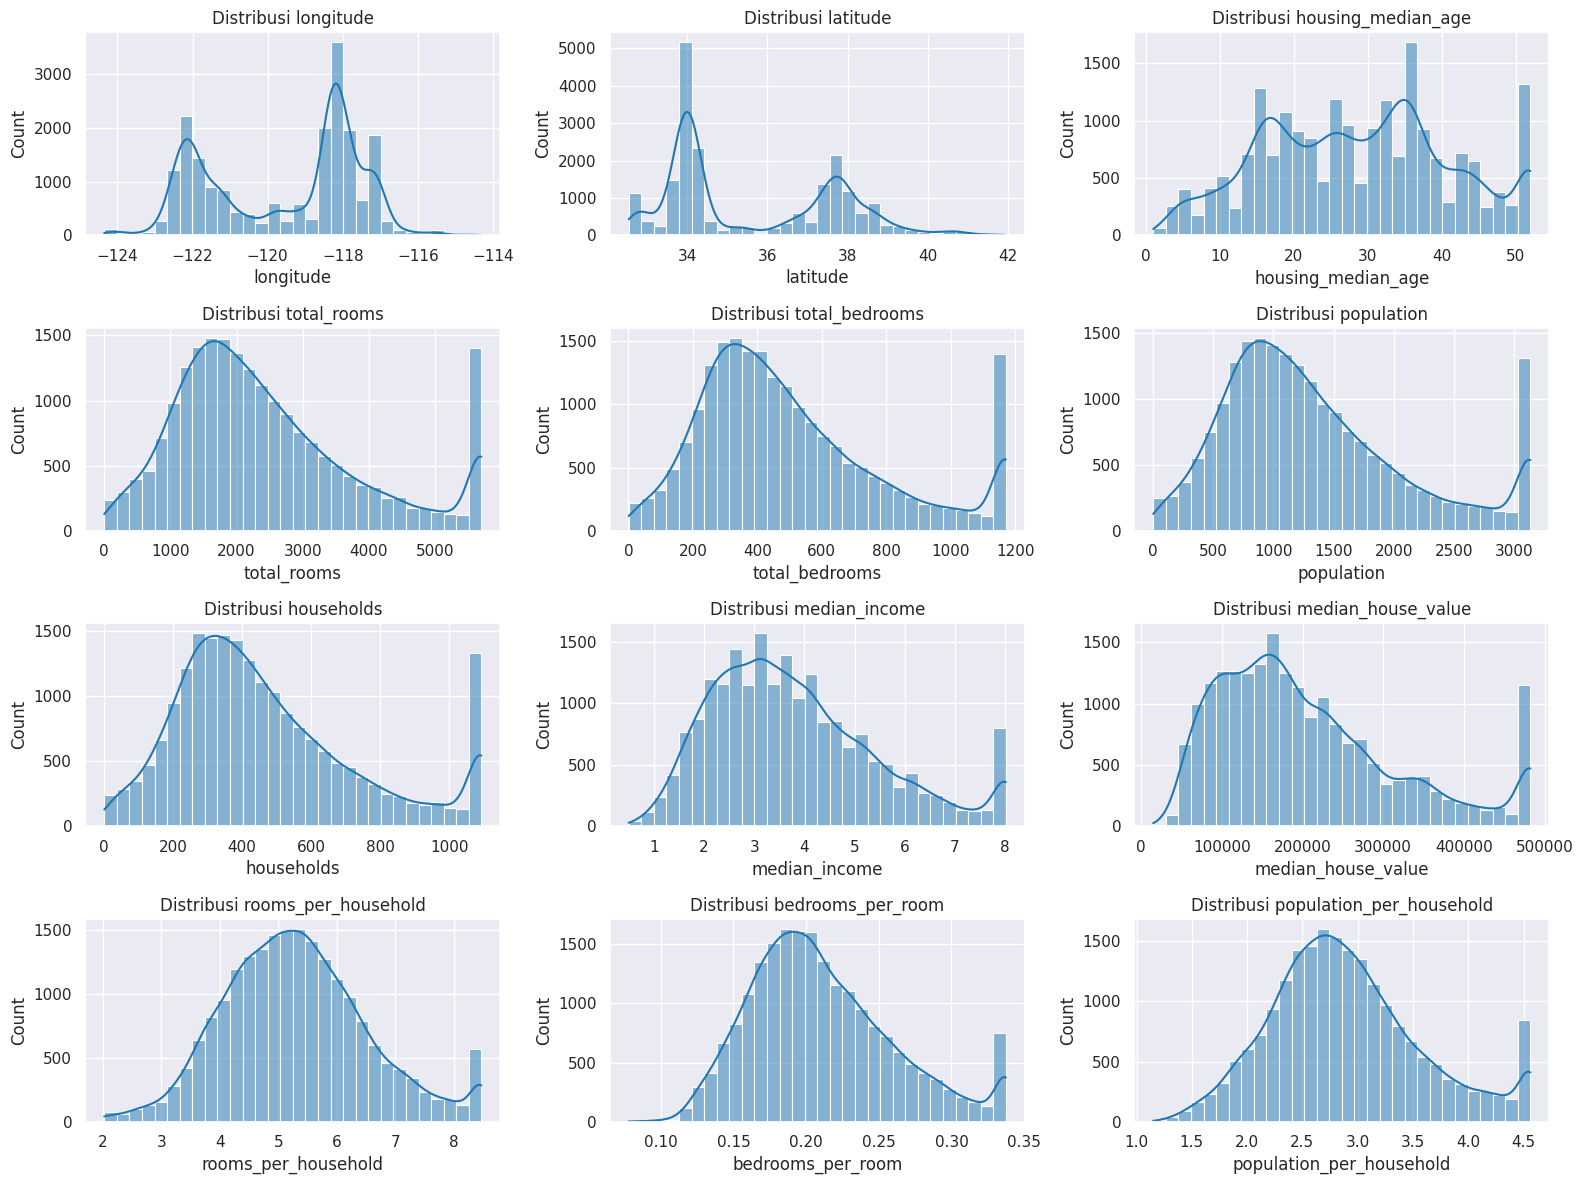

In [9]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(math.ceil(len(num_features)/3), 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='tab:blue')
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

### Korelasi antar Fitur Numerik

Digunakan heatmap korelasi untuk mengidentifikasi hubungan linear antar fitur numerik. Informasi ini berguna untuk:

* Menemukan fitur yang redundant.
* Menghindari multikolinearitas.
* Memahami pengaruh antar variabel.


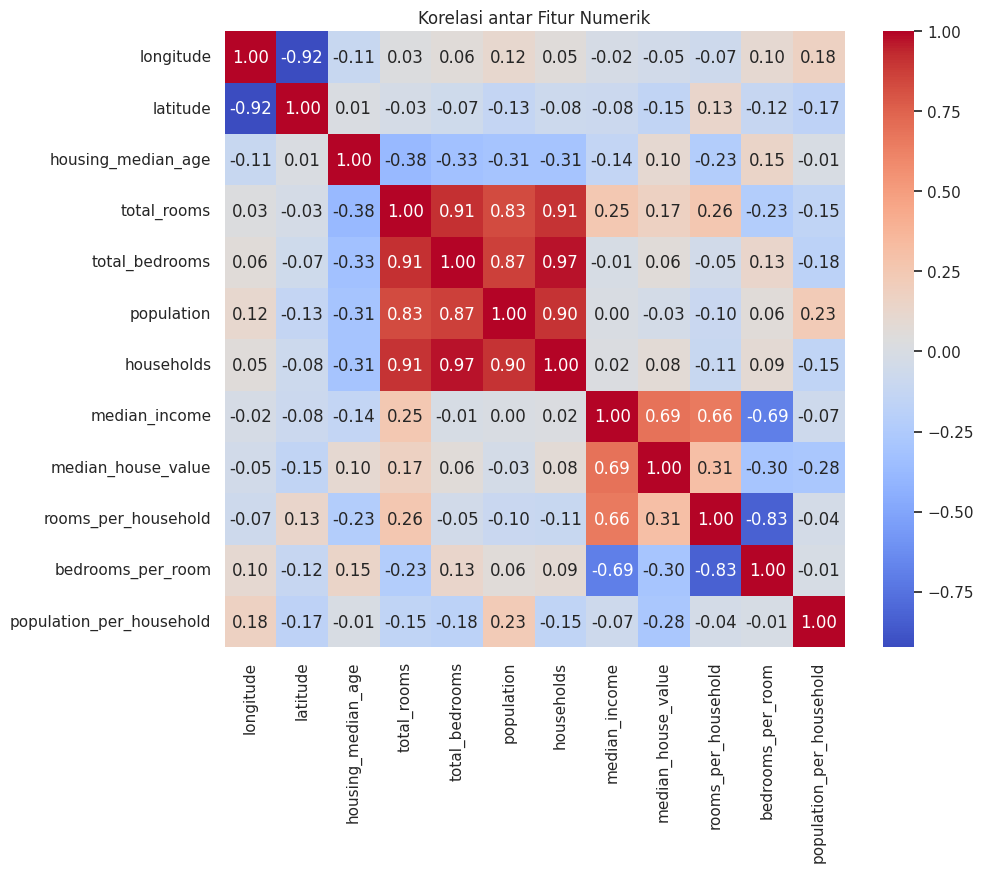

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

##5. Modeling

### Persiapan Fitur dan Target

Pada tahap ini, kita memisahkan fitur (X) dan target (y), serta menerapkan transformasi logaritmik pada target untuk mengurangi efek skewness dan menangani distribusi target yang tidak normal.

* `X = df.drop(columns="median_house_value")`
  Menghapus kolom target dari dataset untuk dijadikan fitur input.

* `y = np.log1p(df["median_house_value"])`
  Menerapkan transformasi log(1 + x) pada target `median_house_value` untuk memperhalus distribusi data target.

In [11]:
X = df.drop(columns="median_house_value")
y = np.log1p(df["median_house_value"])

### Identifikasi Tipe Fitur

Kita mengelompokkan fitur ke dalam dua kategori:

* `numeric_features`: Fitur bertipe numerik.
* `categorical_features`: Fitur bertipe kategorikal.


In [12]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

### Pipeline Pranala (Preprocessing)

Pipeline preprocessing digunakan untuk mempersiapkan data sebelum masuk ke model.



#### Pipeline Numerik

* `SimpleImputer(strategy="median")`: Mengisi nilai kosong menggunakan nilai median.
* `MinMaxScaler()`: Menskalakan nilai agar berada dalam rentang 0–1.



In [13]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

#### Pipeline Kategorikal

* `OneHotEncoder(drop="first")`: Mengubah nilai kategorikal menjadi vektor numerik, drop level pertama untuk menghindari dummy variable trap.




In [14]:
categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"))
])

#### ColumnTransformer

Menggabungkan pipeline numerik dan kategorikal ke dalam satu objek transformasi:



In [15]:
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

###  Pipeline Pemodelan

Model yang digunakan adalah **`HistGradientBoostingRegressor`**, sebuah algoritma ensemble boosting yang efisien untuk data tabular:

* Pipeline menggabungkan proses preprocessing dan pelatihan model menjadi satu alur terintegrasi.
* `set_output(transform="pandas")` memungkinkan output pipeline dalam bentuk DataFrame.

In [16]:
model_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", HistGradientBoostingRegressor(random_state=42))
])
model_pipeline.set_output(transform="pandas")

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('regressor', HistGradientBoostingRegressor(random_state=42))])

###  Pembagian Data Training dan Test

Data dibagi menjadi dua subset untuk pelatihan dan evaluasi:

* `test_size=0.2`: 20% data digunakan sebagai data uji.
* `random_state=42`: Menjaga konsistensi hasil pembagian.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Hyperparameter Tuning dengan RandomizedSearchCV

Dilakukan pencarian parameter terbaik menggunakan teknik Randomized Search:

* `param_dist`: Ruang parameter yang dieksplorasi.
* `n_iter=10`: Jumlah kombinasi parameter yang dicoba.
* `cv=3`: 3-fold cross-validation.
* `scoring='r2'`: Metrik evaluasi yang digunakan.
* `n_jobs=-1`: Menggunakan seluruh core CPU untuk percepatan proses.


In [18]:
param_dist = {
    'regressor__max_iter': [100, 200, 300],
    'regressor__max_leaf_nodes': [31, 50, 100],
    'regressor__learning_rate': [0.05, 0.1, 0.2]
}

random_search = RandomizedSearchCV(
    model_pipeline, param_distributions=param_dist,
    n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=1
)

### Training Model dan Output Parameter Terbaik

Model dilatih menggunakan data training, dan waktu pelatihan dicatat. Setelah pelatihan selesai, ditampilkan parameter terbaik dari hasil pencarian.


In [19]:
start = time.time()
random_search.fit(X_train, y_train)
print(f"\n>> Waktu training: {time.time() - start:.2f} detik")
print("\nParameter terbaik:")
print(random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

>> Waktu training: 33.94 detik

Parameter terbaik:
{'regressor__max_leaf_nodes': 100, 'regressor__max_iter': 300, 'regressor__learning_rate': 0.05}


##6. Evaluation

### Evaluasi Model Terbaik

Setelah proses pelatihan dan tuning, model terbaik dari `RandomizedSearchCV` diekstrak dan digunakan untuk membuat prediksi pada data uji (`X_test`). Karena target semula ditransformasi menggunakan `log1p`, maka hasil prediksi dan target dikembalikan ke skala aslinya menggunakan `expm1`.


In [20]:
best_model = random_search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test)


### Metode Evaluasi Kinerja Model

Fungsi `evaluate_model()` menghitung dan menampilkan metrik evaluasi regresi:

* **R² Score** – seberapa baik model menjelaskan variasi data.
* **RMSE** – Root Mean Squared Error.
* **MAE** – Mean Absolute Error.


In [21]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print("\n=== Evaluasi Model ===")
    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : {rmse:.4f}")
    print(f"MAE      : {mae:.4f}")

evaluate_model(y_test_exp, y_pred)


=== Evaluasi Model ===
R² Score : 0.8435
RMSE     : 44481.1436
MAE      : 28332.1616


### Visualisasi: Prediksi vs Nilai Aktual

Scatter plot berikut memperlihatkan hubungan antara prediksi dan nilai aktual:

* Titik-titik dekat garis merah putus-putus menandakan prediksi yang mendekati nilai aktual.
* Penyimpangan dari garis tersebut menunjukkan error prediksi.


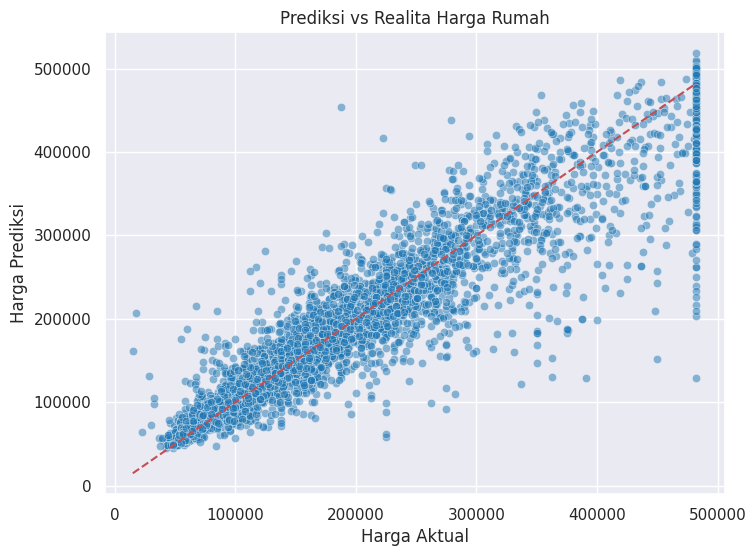

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=y_pred, alpha=0.5, color='tab:blue')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], '--r')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Realita Harga Rumah")
plt.show()

### Visualisasi: Distribusi Residual

Fungsi `plot_residuals()` digunakan untuk melihat distribusi selisih antara nilai aktual dan prediksi:

* Residual = `y_true - y_pred`
* Idealnya, residual terdistribusi normal dan terpusat di sekitar nol.


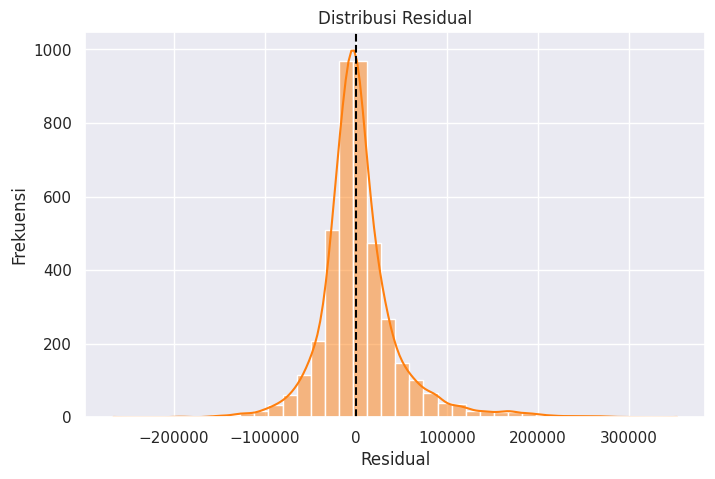

In [23]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=40, kde=True, color='tab:orange')
    plt.title("Distribusi Residual")
    plt.xlabel("Residual")
    plt.ylabel("Frekuensi")
    plt.axvline(0, color='black', linestyle='--')
    plt.show()

plot_residuals(y_test_exp, y_pred)

### Validasi Silang (Cross-validation)

Dilakukan validasi silang sebanyak 5 lipatan (`5-fold`) pada keseluruhan data untuk menilai stabilitas dan generalisasi model:


In [24]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² Score (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Cross-validation R² Score (5-fold): 0.7014 ± 0.0602


### Prediksi Harga Rumah Baru

Model juga digunakan untuk memprediksi harga rumah baru dengan spesifikasi tertentu. Fitur-fitur numerik tambahan seperti `rooms_per_household`, `bedrooms_per_room`, dan `population_per_household` dihitung secara manual sesuai formula preprocessing.


In [25]:
new_house = pd.DataFrame([{
    "longitude": -118.0,
    "latitude": 34.0,
    "housing_median_age": 30,
    "total_rooms": 2000,
    "total_bedrooms": 400,
    "population": 800,
    "households": 300,
    "median_income": 5.0,
    "ocean_proximity": "NEAR OCEAN",
    "rooms_per_household": 2000 / 300,
    "bedrooms_per_room": 400 / 2000,
    "population_per_household": 800 / 300
}])

predicted_price = np.expm1(best_model.predict(new_house)[0])
print("\n=== Prediksi Harga Rumah Baru ===")
print(f"Spesifikasi rumah:\n{new_house.to_string(index=False)}")
print(f"\n>> Prediksi harga rumah: ${predicted_price:,.2f}")


=== Prediksi Harga Rumah Baru ===
Spesifikasi rumah:
 longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income ocean_proximity  rooms_per_household  bedrooms_per_room  population_per_household
    -118.0      34.0                  30         2000             400         800         300            5.0      NEAR OCEAN             6.666667                0.2                  2.666667

>> Prediksi harga rumah: $290,653.41
